<a href="https://colab.research.google.com/github/Lenakirara/QuarentenaDados_Alura/blob/master/quarentenaDados_Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 01

- Analisando dados do MovieLens

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
# filmes - dataframe // .head() busca as 5 primeiras posições
filmes.columns = ['filmeId', 'título', 'genero']
filmes.head()

,filmeId,título,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#traz a documentação de filmes.head
#lendo a documentação de um metodo/atributo
?filmes.head

In [0]:
#lendo a documentação do tipo (docstring)
?filmes

In [0]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
#renomear as colunas
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [0]:
#verifica as informações de avaliacoes
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [0]:
avaliacoes.query('filmeId == 1').mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [0]:
#media das notas
nota_media_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
nota_media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
#juntar informaçoes - JOIN
filmes_com_media = filmes.join(nota_media_por_filme, on = 'filmeId')
filmes_com_media.head()

,filmeId,título,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_com_media.sort_values('nota')

,filmeId,título,genero,nota
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [0]:
filmes_com_media.sort_values('nota', ascending=False).head(15)

,filmeId,título,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


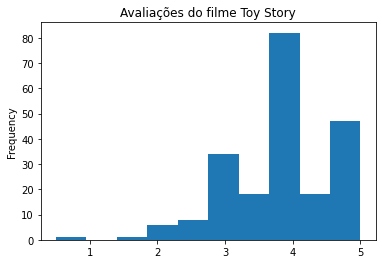

In [0]:

avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist')
plt.title('Avaliações do filme Toy Story')
plt.show()

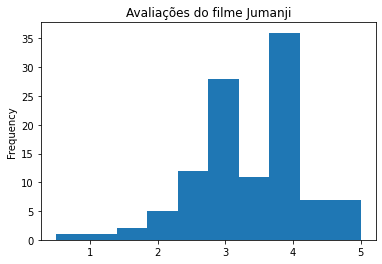

In [0]:
avaliacoes.query('filmeId == 2')['nota'].plot(kind='hist',
                                              title='Avaliações do filme Jumanji')
plt.show()

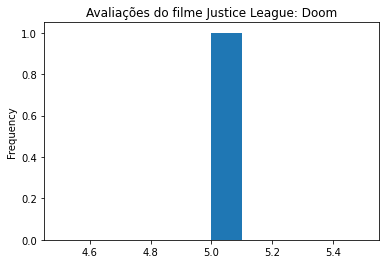

In [0]:
avaliacoes.query('filmeId == 102084')['nota'].plot(kind='hist',
                                                   title='Avaliações do filme Justice League: Doom')
plt.show()

### DESAFIOS - AULA 01



- DESAFIO 01 : O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?
Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
filmes_sem_avaliacao = filmes_com_media['nota'].isnull()
filmes_com_media[filmes_sem_avaliacao]

,filmeId,título,genero,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


- DESAFIO 02: Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [0]:
filmes_com_media = filmes_com_media.rename(columns={'nota' : 'nota_media'})
filmes_com_media.head()

,filmeId,título,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


- DESAFIO 03: Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
total_votos = avaliacoes['nota']
filmes_com_media_votos = filmes_com_media.join(total_votos, on='filmeId')
filmes_com_media_votos = filmes_com_media_votos.rename(columns={'nota' : 'total_votos'})
filmes_com_media_votos.head(10)

,filmeId,título,genero,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,5.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,5.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,5.0
6,7,Sabrina (1995),Comedy|Romance,3.185185,4.0
7,8,Tom and Huck (1995),Adventure|Children,2.875000,5.0
8,9,Sudden Death (1995),Action,3.125000,5.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,5.0


- DESAFIO 04: Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
filmes_com_media_votos['nota_media'] = filmes_com_media_votos['nota_media'].round(2)
filmes_com_media_votos.head()

,filmeId,título,genero,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,5.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,5.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,3.0


- DESAFIO 05: Descobrir os generos dos filmes (quais são eles, únicos). 

In [0]:
diferentes_generos = filmes_com_media_votos.genero.str.get_dummies('|')
genero = diferentes_generos.columns.to_list()
genero

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

- DESAFIO 06: Contar o número de aparições de cada genero.

In [0]:
qtd_generos = filmes_com_media_votos.genero.str.get_dummies('|').sum()
qtd_generos

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

- DESAFIO 07: Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

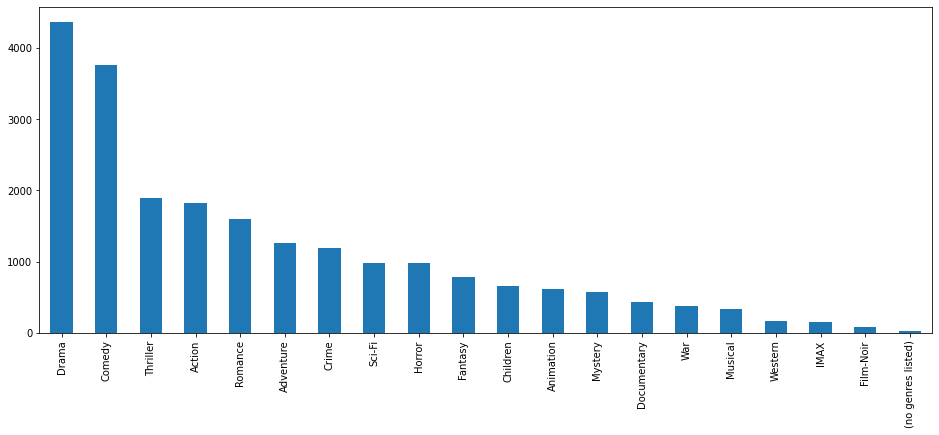

In [0]:
qtd_generos.sort_values(ascending=False).plot(kind='bar', figsize=(16,6))
plt.show()